<a href="https://colab.research.google.com/github/DeshikReddy01/project/blob/main/LSTM_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###1.Fetch Historical Stock Data
import yfinance as yf

In [ ]:
#Example:Fetching data for Apple Inc.
df=yf.download('AAPL',start='2015-01-01',end='2024-12-31')
df=df[['Close']]
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288580
2015-01-05,23.604330
2015-01-06,23.606552
2015-01-07,23.937571
2015-01-08,24.857300


In [ ]:
#2.Normalize and Prepare the Data
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)

In [ ]:
#Create sequences
def create_dataset(data,time_step=60):
    X,y=[],[]
    for i in range(time_step,len(data)):
      X.append(data[i-time_step:i,0])
      y.append(data[i,0])
    return np.array(X),np.array(y)

In [ ]:
X,y=create_dataset(df_scaled)
X=X.reshape(X.shape[0],X.shape[1],1)


In [ ]:
###3.Build the LSTM Model
from keras.models import Sequential
from keras.layers import LSTM,Dense
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
###4.Train and Validate the Model

#Split Data
split=int(len(X)*0.8)
X_train,X_test=X[:split],X[split:]
y_train,y_test=y[:split],y[split:]

#Train
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.0182 - val_loss: 0.0020
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 3.0909e-04 - val_loss: 0.0011
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 2.7698e-04 - val_loss: 0.0023
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 2.7061e-04 - val_loss: 0.0012
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 2.6558e-04 - val_loss: 0.0011
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - loss: 2.4437e-04 - val_loss: 0.0011
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 2.7732e-04 - val_loss: 0.0014
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 2.1782e-04 - val_loss: 0.0021
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 2.3563e-04 - val_loss: 9.7149e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 2.3067e-04 - val_loss: 0.0018
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - loss: 2.2427e-04 - val_loss: 0.0015
Epoch 12/20
62

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


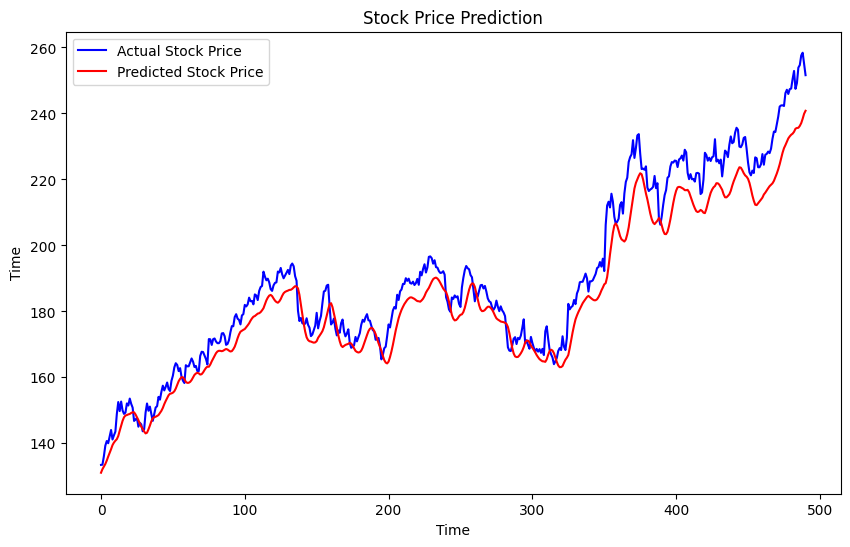

In [ ]:
###5.Predictions vs Actual

import matplotlib.pyplot as plt
predicted_stock_price=model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price.reshape(-1,1))
actual_price=scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(10,6))
plt.plot(actual_price,color='blue',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Time')
plt.legend()
plt.show()

<Axes: title={'center': 'Price with MA20 & RSI'}, xlabel='Date'>

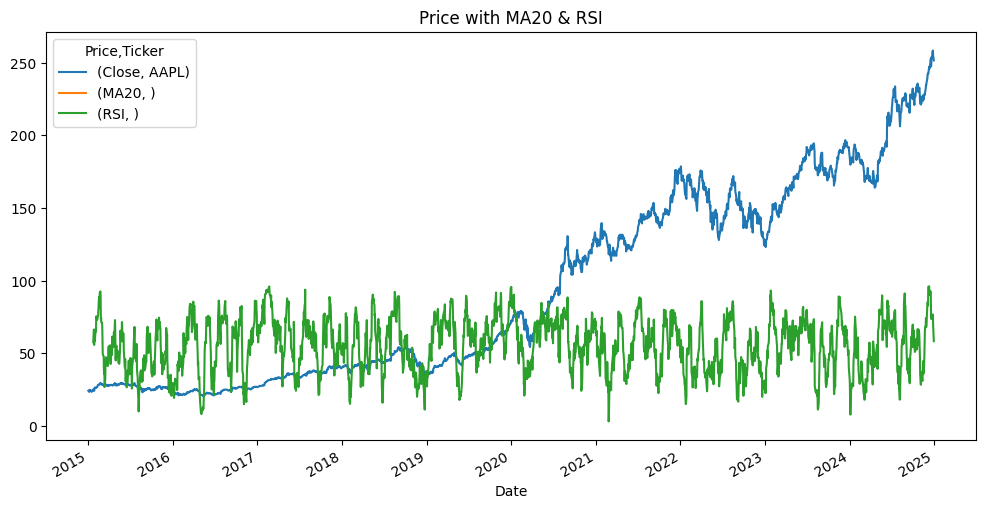

In [ ]:
###6.Integrate Moving Average &RSI
df['MA20']=df['Close'].rolling(window=20).mean()

#RSI Calculation
def compute_rsi(data,time_window):
    diff=data.diff(1).dropna()
    gain=0*diff
    loss=0*diff
    gain[diff>0]=diff[diff>0]
    loss[diff<0]=-diff[diff<0]
    avg_gain=gain.rolling(window=time_window).mean()
    avg_loss=loss.rolling(window=time_window).mean()
    rs=avg_gain/avg_loss
    rsi=100-(100/(1+rs))
    return rsi
df['RSI']=compute_rsi(df['Close'],14)
df[['Close','MA20','RSI']].plot(figsize=(12,6),title='Price with MA20 & RSI')